In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV', 'AGG']

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-23 to 2019-07-02 - 70'

In [3]:
# quote.drop_mask()
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 2) & (stat['mean'] > .8) & (stat['shrp'] > 1.6)]
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
MBB,30,1.020012,0.254470,3.384616,0.325100
BNDW,30,1.570845,0.421867,3.347301,0.254067
BNDX,30,1.527144,0.425111,3.218957,0.193599
VMBS,30,0.897482,0.233648,3.161819,0.264901
BND,30,1.583456,0.452280,3.150093,0.289158
BLV,30,3.484643,1.057138,3.146148,0.997839
AGG,30,1.581174,0.452983,3.140172,0.287233
BIV,30,1.976441,0.596255,3.048545,0.379736
IEF,30,2.330260,0.760061,2.857048,0.494367


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(2)

['MBB'] -2.519596235237155 0.8 0.06502000839691999 3.384616243634075
['MBB', 'BNDW'] -2.58364340092803 0.8243987163005482 0.05791670061741161 3.3659588178459896
['MBB', 'BNDX'] -2.7112704884130907 0.6386461042646334 0.05186994801840157 3.301786540696126
['MBB', 'HYD'] -2.779822445270964 0.03629992544196159 0.07341650664974268 2.789538877362668
['BNDW', 'CMF'] -3.2126020825503607 -0.37760014098222194 0.043584966736259875 2.7785869083043986
['BNDW', 'HYD'] -3.259241532208893 -0.45467327950454406 0.0663131988702343 2.770881451574583
['BNDX', 'CMF'] -3.386301497166718 -0.6094250801494326 0.03753821413724982 2.7144146311545354
['BNDX', 'HYD'] -3.4372399704244514 -0.6907972422709566 0.06026644627122426 2.706709174424719


['BNDX', 'HYD']

In [5]:
quote.setup_mask(['BNDX', 'HYD'])
quote.find_optimal_ratio()

({'BNDX': 0.48, 'HYD': 0.52}, 1.2245, 0.1543, 6.9064)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,30.0,1.222066,0.156215,0.887686,1.105250,1.211264,1.317540,1.541334,6.806872,0.142410
BNDX,30.0,1.527144,0.425111,0.666180,1.365780,1.632628,1.718959,2.313707,3.218957,0.193599
HYD,30.0,0.949504,0.360350,0.246670,0.692568,0.817080,1.291201,1.668247,2.194462,0.409065


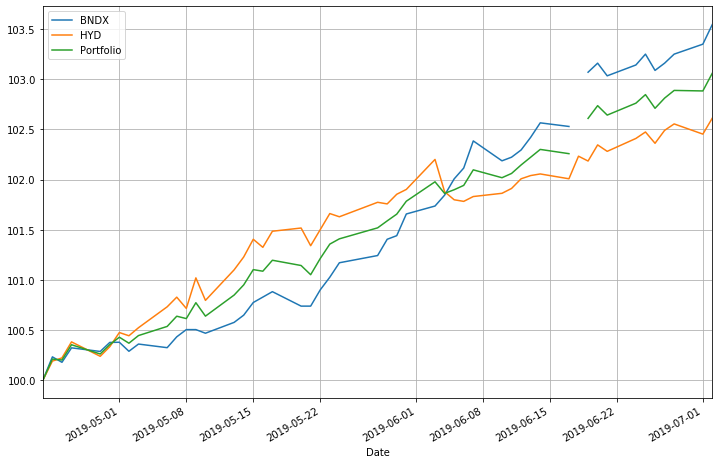

In [6]:
%pylab inline
quote.setup_mask(['BNDX', 'HYD'])
quote.graph({'BNDX': 0.48, 'HYD': 0.52})